Reference: https://jax.readthedocs.io/en/latest/notebooks/thinking_in_jax.html

#What is JAX?


*   JAX is NumPy on accelerator (CPU/GPU/TPU) with great automatic differentiation for high-performance machine learning research.
*   JAX can automatically differentiate native Python and NumPy code (it can even take derivatives of derivatives of derivatives) by the help of Autograd feature.
*   It supports reverse-mode as well as forward-mode differentiation, and the two can be composed arbitrarily to any order.
*   JAX even lets us just-in-time compile our own Python functions into XLA-optimized kernels using a one-function API.
*   JAX uses asynchronous dispatch to hide Python overheads.


Arrays in JAX are represented as DeviceArray instances and are agnostic to the place where the array lives (CPU, GPU, or TPU).

All the operations (dot product, slicing, etc) take place on the GPU/TPU (or in case no access to accelelerator is possible than CPU),

memory backing this array stays on the device which is fetched back to the host when we need to they get back to CPU just for printing or saving to the disk

But other than these it'd pretty much act like Numpy array. We can plot it, and do similar stuff. other than thses you can do similar operations as numpy array plot it etc

#JAX Vs Numpy

there is one important difference between JAX and NumPy arrays: JAX arrays are immutable, meaning that once created their contents cannot be changed.

Device agnostic!

Dot product using JAX is faster than regular Numpy.

When block_until_ready() wasn't used, it ran for like 100 loops and when it was included it ran just for 10 loops. Talking about microbenchmarks, dot product using JAX without block_unitl_ready() did slightly better, but I guess this can't be generalized since it's a really simple operation. "block_until_ready()" may shine when operation is complex, thoughts? (to be discussed)

It basically means wait until the operation is complete.

-By default JAX runs everything asynchronously. Everytime we call an operation it gets queued up to the accelerator and then immediately returns control back to Python.

Advantage -
Python and accelerated code can run in parallel, but it's not great for microbenchmarks.


Automatic Differentiation

XLA is smart enough to not work on those tasks which aren't required. eg. it'll only check for y[:100,:100] and not the whole y!

Vectorization with vmap
What is VECTORIZATION?

Vectorization is a method of applying a function to all the elements of an array in one pass which in turn makes code much faster.

VMAP works alot like a regular Python map!



Parallel accelerators with pmap
Pmap takes our Python program and replicates it across multiple devices to run everything in parallel. So, instead of using only one GPU/TPU, we can parallelize the workload across multiple GPUs/TPUs.

By the help of pmap we take advantage of all the devices available for speeding up the code

LAX
Anagram of XLA
a lower-level module that calls to primitive operations in JAX.



By now you must be well aware of the limitations of JAX when it comes to implementing ML/DL frameworks. Biggest limitations are -- JAX is stateless, it needs pure functions to operate with speed on, and that side-effects in functions are not taken care of while using jit.

In ML OOP paradigm, like used in tensorflow and pytorch, program state is a very important feature as we use it to pass model parameters, optimizer states and details about NN layers.

Changing program states -

Is one kind of a side-effect only
That is how OOP programs handle variables and parameters
Hope this below stateful program clears it for you

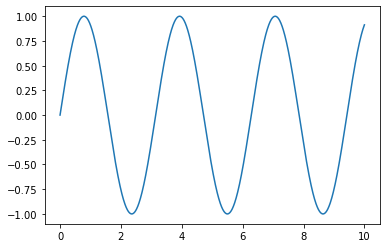

In [49]:
import matplotlib.pyplot as plt
import numpy as np
x_np = np.linspace(0,10,1000)
y_np = 2*np.cos(x_np)*np.sin(x_np)
plt.plot(x_np,y_np)

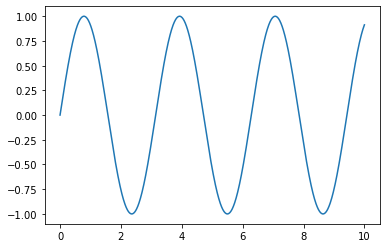

In [50]:
#In JAX

import jax.numpy as jnp
x_jnp = jnp.linspace(0,10,1000)
y_jnp = 2*jnp.cos(x_jnp)*jnp.sin(x_jnp)
plt.plot(x_jnp, y_jnp)

In [51]:
%timeit -n 1 -r 1 2*jnp.cos(x_jnp)*jnp.sin(x_jnp)
%timeit -n 1 -r 1 2*np.cos(x_np)*np.sin(x_np)

1 loop, best of 1: 1.16 ms per loop
1 loop, best of 1: 224 µs per loop


In [52]:
type(x_np), type(y_np)


(numpy.ndarray, numpy.ndarray)

In [53]:
type(x_jnp), type(y_jnp)

(jaxlib.xla_extension.DeviceArray, jaxlib.xla_extension.DeviceArray)

Observation :
1. Time required to process numpy operation was lesser than jnp! Strange!

2. The code blocks are identical aside from replacing np with jnp, and the results are the same

3. x_np, y_np --> Numpy array (ndarray)
x_jnp, y_jnp  ---> Device array

Python’s duck-typing allows JAX arrays and NumPy arrays to be used interchangeably in many places.

However, there is one important difference between JAX and NumPy arrays: JAX arrays are immutable, meaning that once created their contents cannot be changed.

In [54]:
#Numpy : Mutable arrays
x = np.arange(10)
x[0] = 10
print(x)

[10  1  2  3  4  5  6  7  8  9]


The equivalent in JAX results in an error, as JAX arrays are immutable:

In [55]:
#JAX :Immutable arrays
x = jnp.arange(10)
x[0] = 10
print(x)

TypeError: ignored

⛔'<class 'jaxlib.xla_extension.DeviceArray'>' object does not support item assignment.

For updating individual elements, JAX provides an indexed update syntax that returns an updated copy:

In [56]:
x = jnp.arange(10)
y = x.at[0].set(100)
y

DeviceArray([100,   1,   2,   3,   4,   5,   6,   7,   8,   9], dtype=int32)

Note : "set(...)" and not "set[...]"

#NumPy, lax & XLA: JAX API layering

Key Concepts:

*   jax.numpy is a high-level wrapper that provides a familiar interface.
*   jax.lax is a lower-level API that is stricter and often more powerful.
*   All JAX operations are implemented in terms of operations in XLA – the Accelerated Linear Algebra compiler.

You can think of jax.lax as a stricter, but often more powerful, API for working with multi-dimensional arrays. For example, while jax.numpy will implicitly promote arguments to allow operations between mixed data types, jax.lax will not!



In [57]:
#JAX allows operations between mixed types
jnp.add(1,1.0)

DeviceArray(2., dtype=float32, weak_type=True)

In [58]:
#Lax doesn't allow operations between mixed types
from jax import lax
lax.add(1,1.0)

TypeError: ignored

In [59]:
#Workaround for above

lax.add(jnp.float32(1),7.4)

DeviceArray(8.4, dtype=float32)

In [60]:
x = jnp.array([1, 2, 1])
y = jnp.ones(10)
jnp.convolve(x, y)

DeviceArray([1., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.], dtype=float32)

In [61]:
from jax import lax
result = lax.conv_general_dilated(
    x.reshape(1, 1, 3).astype(float),  # note: explicit promotion
    y.reshape(1, 1, 10),
    window_strides=(1,),
    padding=[(len(y) - 1, len(y) - 1)])  # equivalent of padding='full' in NumPy
result[0, 0]

DeviceArray([1., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.], dtype=float32)

In [62]:
%timeit -n 1 -r 5 jnp.convolve(x,y)
%timeit -n 1 -r 5 result


1 loop, best of 5: 313 µs per loop
1 loop, best of 5: 271 ns per loop


This is a batched convolution operation designed to be efficient for the types of convolutions often used in deep neural nets. It requires much more boilerplate, but is far more flexible and scalable than the convolution provided by NumPy

Note:
-(jax.lax operation) LAX took less processing time than JAX

#To JIT or not to JIT

In [63]:
X = jnp.arange(4)
print(X.mean(0))

1.5


In [64]:
def norm(X):
  X = X-X.mean(0)
  return X/X.std(0)

In [65]:
from jax import jit
norm_jit = jit(norm)

%timeit -n 1 -r 5 norm(X)
%timeit -n 1 -r 5 jit(norm)(X)

1 loop, best of 5: 841 µs per loop
The slowest run took 693.64 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 210 µs per loop


In [66]:
%timeit -n 1 -r 5 norm(X).block_until_ready()
%timeit -n 1 -r 5 jit(norm)(X).block_until_ready()

1 loop, best of 5: 853 µs per loop
1 loop, best of 5: 218 µs per loop


Execution time is orders of magnitude faster in the JIT-compiled case

###That said, there are some constraints with using JIT:

It requires all arrays to have static shapes. That means that some JAX operations are incompatible with JIT compilation.

In [67]:
def get_negatives(x):
  return x[x < 0]

x = jnp.array(np.random.randn(10))
get_negatives(x)

DeviceArray([-0.8526568 , -0.1155469 , -1.393048  , -2.2834382 ,
             -0.12289616], dtype=float32)

In [68]:
#IndexError: Array boolean indices must be concrete.
jit(get_negatives)(x)

NonConcreteBooleanIndexError: ignored

This is because the function generates an array whose shape is not known at compile time: the size of the output depends on the values of the input array, and so it is not compatible with JIT.